<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Data-Analysis-Projects/blob/master/Lilly_ai_Take_Home_Test_Ken_Wood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Lilly.ai - Take Home Test
#### Ken Wood

#### 12/1/21

The executive team is interested to know over time:

a. How Customers are searching and buying various products.

b. Any insight about the products.

c. Any interesting pattern from your analysis.

You can also include the following in your analysis
1. Search to Product-View conversion rate
2. Product-View to Order-Complete conversion rate

Column Definitions of `event_logs_v2.csv`

Column | Definition
--- | ---
`event_code` | Refer to the below table for the event_code and event_name map
`event_timestamp` | `UTC timestamp when the event happened`
`user_id` | `the user who caused the event`
`product_id` | `user interacted with the product`

`event_code` mapping

Event_Code|Event_Name| Description
--- |--- |---
`1` | `Search` | When a user does a product search on the website.
`2` | `Product_View` | When a user clicks on one of the products in the  search result. This can happen after the Search event.
`3` | `Order-Complete` | When a user orders a product. This can happen after the Product_View event.

Import Python packages we will need...

In [96]:
import pandas as pd
import seaborn as sns

Mount Google Drive where `event_logs_v2.csv` resides...

In [97]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Load the input data file and quickly inspect it...

In [98]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Lily.ai Take Home Test/event_logs_v2.csv')
df.head()

,event_code,event_timestamp,user_id,product_id
0,2,2020-11-29T20:04:54Z,13fe7bed08c78ca6f563430b4fd284a1,cc5d78fc86ca1ea6dab7595d8b09a030
1,2,2020-11-29T20:04:59Z,f081f5ce4e8bdd61d618bd64f0647e46,7b82f5b46759a9f238982f2a7c367ba1
2,2,2020-11-29T19:58:19Z,d43f081630bd3a13518ea950213d7bcf,bf91bb4cd7e62b353232e709a30f52be
3,2,2020-11-29T19:58:34Z,5257b92203fd1122a1d9d09e0a236eb2,a1317a5b5531f4dd2d1bbbf9f0ebecca
4,2,2020-11-29T19:58:44Z,0434613b9d24b9f475bde53472787825,0b3ffd66553d9a2440b1ff8500b6b686


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265614 entries, 0 to 1265613
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   event_code       1265614 non-null  int64 
 1   event_timestamp  1265614 non-null  object
 2   user_id          1265614 non-null  object
 3   product_id       1152471 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.6+ MB


Convert `event_timestamp` feature to datetime variable type.

In [100]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265614 entries, 0 to 1265613
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   event_code       1265614 non-null  int64              
 1   event_timestamp  1265614 non-null  datetime64[ns, UTC]
 2   user_id          1265614 non-null  object             
 3   product_id       1152471 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 38.6+ MB


In [102]:
df.isnull().sum()

event_code              0
event_timestamp         0
user_id                 0
product_id         113143
dtype: int64

113143 nulls found in the `product_id` feature. These nulls only occur for the `event_code`= 1 events.

In [103]:
pct_total = sum(df['product_id'].isnull())/len(df)
pct_total

0.08939771525915484

Get value counts for each feature...

In [104]:
df['event_code'].value_counts()


2    1108507
1     113143
3      43964
Name: event_code, dtype: int64

In [105]:
df['product_id'].value_counts()

941e2727e3c31d1ff974a8433d1cb4b3    1073
0437700657ed3847e99d97bd34bc937c     516
0dcb511d0224643296d15f25db78bec1     239
953b527ac3bcea845a5469c73c10f35d      72
fe57a0cbf58a87ca1916215e6f984892      56
                                    ... 
80648fe130d6ad5358b919d8dc71e473       1
699592ee8cc221f9fa28397d4183b3db       1
10be11d4ae425744c45a6ff9911e18da       1
16cebbec47af3f66bc8ad845c94ab51c       1
798b9e76e1a6c947d242acb6fa64c3ca       1
Name: product_id, Length: 814313, dtype: int64

We have 814313 unique `product_id`s.

In [106]:
df['user_id'].value_counts()

37a6259cc0c1dae299a7866489dff0bd    153034
f460272f363fa96fccd7b997d37e107c       887
033ea91087ca037570781bfba82149c4       846
d4489e6c512a746c16d72ed2562a246c       742
3e932b9b3de21ea6e61a088b8075c678       739
                                     ...  
2c0a95863fd53b19759f6eb6d48095bb         1
ab59f9afeac923c5f90fc94e4b9b0aec         1
339b6eaaa3c0b38320bbe26fbbe57f68         1
f3456785eae9e26b0189b804d8501484         1
e62162754c8981b1b4cc52c6cb3aebeb         1
Name: user_id, Length: 222194, dtype: int64

We have 222194 unique `user_id`s.

Let's calculate the `Search` to `Product_View` conversion rate

In [125]:
search_to_product_view_conv_rate = len(df[df['event_code']==2])/len(df)
search_to_product_view_conv_rate

0.8758649951723038

After performing a search, there is a  88% chance that a user will click on a `product_view`.

Let's calculate the `Product_View` to `Order_Complete` conversion rate

In [126]:
product_view_to_order_complete_conv_rate = len(df[df['event_code']==3])/len(df[df['event_code']==2])
product_view_to_order_complete_conv_rate

0.039660552436746

After clicking on a `product_view`, there is a 4% chance that a user will complete an order.

How are Customers searching and buying various products?

In [149]:
event_code_product_id = df.groupby(['product_id','event_code']).count()\
  .sort_values('event_timestamp',ascending=False)\
  .rename(columns={'event_timestamp':'count'}).drop(['user_id'],axis=1).reset_index()
  
event_code_product_id.head()

,product_id,event_code,count
0,941e2727e3c31d1ff974a8433d1cb4b3,2,1073
1,0437700657ed3847e99d97bd34bc937c,2,516
2,0dcb511d0224643296d15f25db78bec1,2,239
3,953b527ac3bcea845a5469c73c10f35d,2,72
4,fe57a0cbf58a87ca1916215e6f984892,2,56


Top 10 `product_ids` by `Product_View`

In [160]:
product_id_product_view = event_code_product_id[event_code_product_id['event_code']==2].head(10)
product_id_product_view

,product_id,event_code,count
0,941e2727e3c31d1ff974a8433d1cb4b3,2,1073
1,0437700657ed3847e99d97bd34bc937c,2,516
2,0dcb511d0224643296d15f25db78bec1,2,239
3,953b527ac3bcea845a5469c73c10f35d,2,72
4,fe57a0cbf58a87ca1916215e6f984892,2,56
5,538a004b9a3f3bdcfb9c3e541cc5028a,2,38
6,c3fc0f28899397acdb90a2044b656ae8,2,36
7,ed6612c3e7ced2398b46588d878fbafa,2,36
8,f82feff59a02a5617b5ce59025ab33e7,2,35
9,0339499794d659877c2c3b3c573d3686,2,34


Text(0.5, 1.0, 'Top 10 Product_IDs viewed in Search')

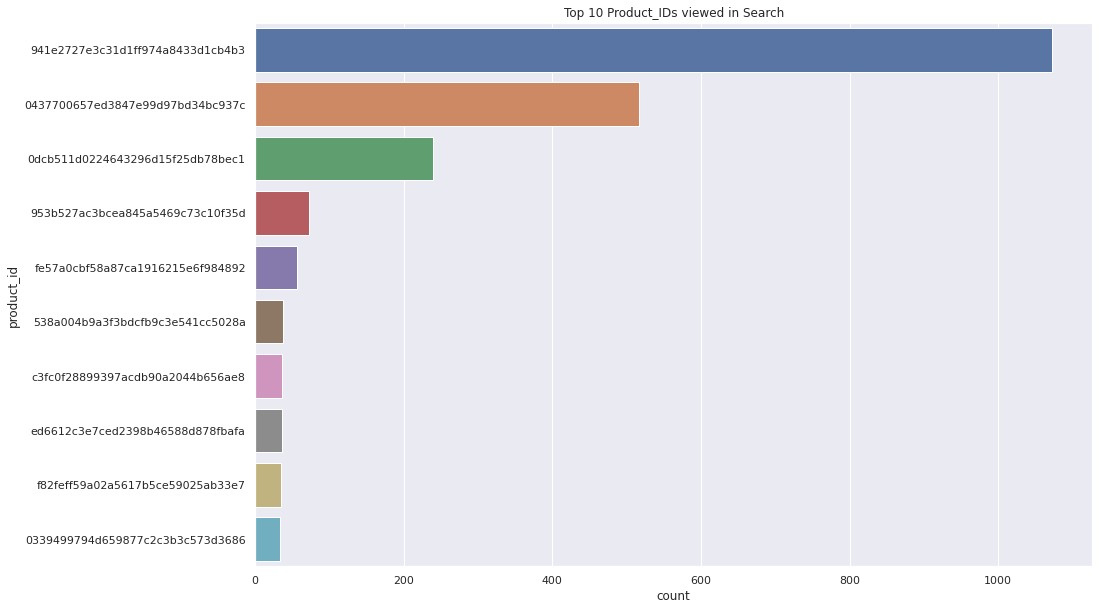

In [162]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(x="count", y="product_id", data=product_id_product_view)
ax.set_title('Top 10 Product_IDs viewed in Search')

Top 10 `product_ids` by `Order_Complete`

In [163]:
product_id_order_complete = event_code_product_id[event_code_product_id['event_code']==3].head(10)
product_id_order_complete

,product_id,event_code,count
671,5dfc7eeb2e6b7eedbcfab1c1300e1651,3,10
1401,ce791b58226735543a441f6298225c89,3,8
1416,5383fd2c284529baf7a325be4bc7bfec,3,8
1868,27ca9bc27aaa03262b233e09347ca2df,3,8
2110,df96f9e52177728cc4b01e9ec1fff5fa,3,8
2270,e600f5408df18f1cd253f55de1ee1ac4,3,7
3413,e707c00ea56170cd9e9d77b0487c8b6f,3,7
5784,55d95b96a80f1faeef7ba05b827fafe7,3,6
5888,981de7e445692f2f5300a2cebcd43abb,3,6
6368,d5e28fb0e05ee7221e7500b59c216cc9,3,6


Text(0.5, 1.0, 'Top 10 Product_IDs Purchased')

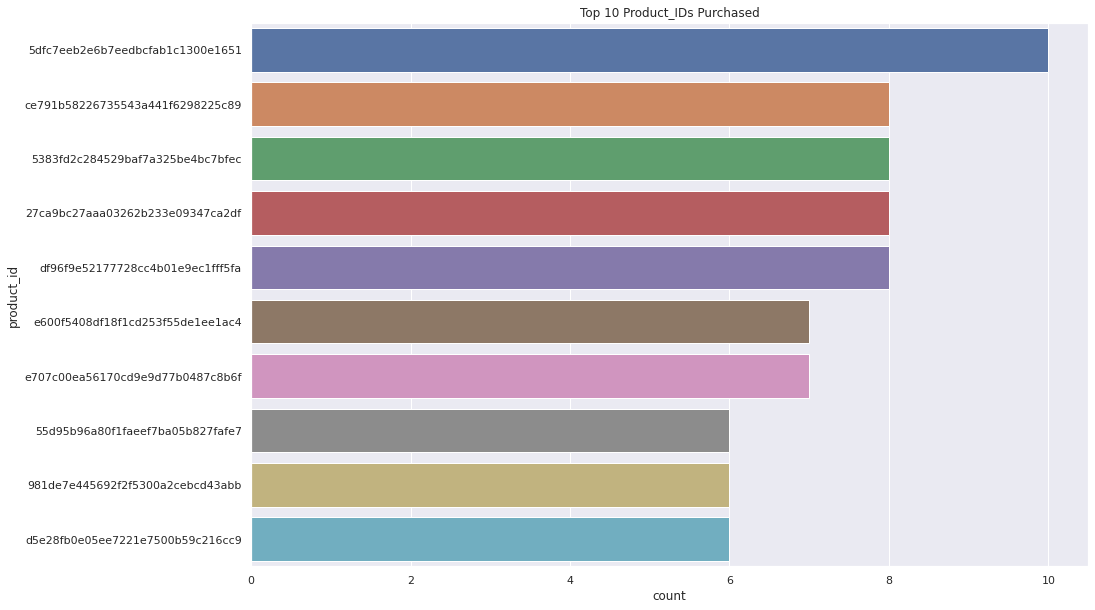

In [164]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(x="count", y="product_id", data=product_id_order_complete)
ax.set_title('Top 10 Product_IDs Purchased')